In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [5]:
data = pd.read_csv ('/Users/zahiramohammed/Desktop/DAPM_dataset_new.csv')

In [6]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,35.0,0,0,0,23.47,6.6,90,0
1,1,54.0,0,0,1,22.40,3.5,100,0
2,1,61.0,0,0,0,22.85,5.8,158,0
3,1,43.0,1,0,0,29.00,5.7,220,1
4,1,7.0,0,0,0,18.50,6.2,158,0
...,...,...,...,...,...,...,...,...,...
495,0,30.0,0,0,0,24.71,6.6,145,0
496,1,48.0,0,0,-1,40.47,3.5,159,0
497,0,54.0,0,0,0,25.79,5.8,85,0
498,1,78.0,0,0,0,32.67,6.8,159,1


Cluster Statistics:
   Cluster    gender        age  hypertension  heart_disease  smoking_history  \
0        0  0.574194  49.264516      0.109677       0.045161        -0.045161   
1        1  0.547170  15.771321      0.009434       0.009434        -0.075472   
2        2  0.629032  70.120968      0.137097       0.080645        -0.395161   
3        3  0.634783  32.469565      0.008696       0.008696        -0.034783   

         bmi  HbA1c_level  blood_glucose_level  diabetes  
0  30.659677     5.590968           137.490323  0.103226  
1  22.597547     5.344340           133.735849  0.037736  
2  28.128710     5.622581           148.653226  0.209677  
3  29.366783     5.273913           131.939130  0.034783  


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


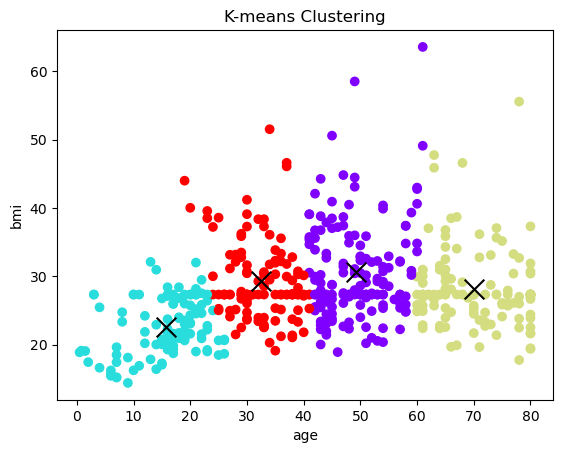

In [8]:
X = data[['age', 'bmi']] #setting clustering features

number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)

kmeans.fit(X) #fitting model on selected feature X

cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_


#Computes mean age and bmi for each cluster to see cluster characteristics
cluster_stats = data.groupby('Cluster').mean().reset_index() 

print("Cluster Statistics:")
print(cluster_stats)

plt.scatter(X['age'], X['bmi'], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='black')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('K-means Clustering')
plt.show()